# Sixt Data Science Lab - Test Task for Data Scientist Job Candidates

## Introduction

In this test task you will have an opportunity to demonstrate your skills of a Data Scientist from various angles - processing data, analyzing and vizalizing it, finding insights, applying predictive techniques and explaining your reasoning about it.

The task is based around a bike sharing dataset openly available at UCI Machine Learning Repository [1].

Please go through the steps below, build up the necessary code and comment on your choices.

## Part 1 - Data Loading and Environment Preparation

**Tasks:**
1. Prepare a Python 3 virtual environment (with virtualenv command). requirements.txt output of pip freeze command should be included as part of your submission.
2. Load the data from UCI Repository and put it into the same folder with the notebook. The link to it is https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset .
3. Load the data into Python runtime as Pandas dataframe.
4. Split the data into two parts. One dataset containing the last 30 days and one dataset with the rest. You will need the dataset with the last 30 days in part 5  

In [ ]:
## TASK: 1 ##
# create a virtual environment and activate it with below commands
# py -m venv .venv/
# cd .venv/Scripts
# cmd
# activate

In [ ]:
## TASK: 2 ##
# download the input data csv files from the given link and place it in the input folder

**Answers / comments / reasoning:**

-

In [33]:
## TASK: 3 ##

# import the libraries
import os, sys, importlib
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from datetime import datetime, timedelta, date
import missingno as msno
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
sns.set(style='whitegrid',color_codes=True)

#pd.options.display.html.table_schema = True
#sys.path.append('./venv/Lib/site-packages')

input_dir = './input'
day_input_file = 'day.csv'
hour_input_file = 'hour.csv'


In [ ]:
# load daily data to python
daily_data = pd.read_csv(os.path.join(input_dir, day_input_file), sep=',')
daily_data.info()

In [13]:
# load hourly data to python
hourly_data = pd.read_csv(os.path.join(input_dir, hour_input_file), sep=',')
hourly_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
hourly_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1495,1496,2011-03-07,1,0,3,16,0,1,1,1,0.34,0.3030,0.31,0.3582,26,96,122
10962,10963,2012-04-06,2,1,4,22,0,5,1,1,0.40,0.4091,0.35,0.2239,34,124,158
398,399,2011-01-18,1,0,1,14,0,2,1,2,0.22,0.2273,0.80,0.1642,2,26,28
2560,2561,2011-04-21,2,0,4,14,0,4,1,1,0.50,0.4848,0.34,0.3881,68,160,228
4734,4735,2011-07-21,3,0,7,4,0,4,1,2,0.72,0.7121,0.84,0.1045,0,4,4


In [8]:
hourly_data.count()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

In [ ]:
hourly_data.groupby(["yr", "mnth"])["instant"].count()

In [ ]:
hourly_data[(hourly_data["yr"]==1) & (hourly_data["mnth"]==12)]["dteday"]

In [ ]:
hourly_data["dteday"].max()

In [3]:
hourly_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

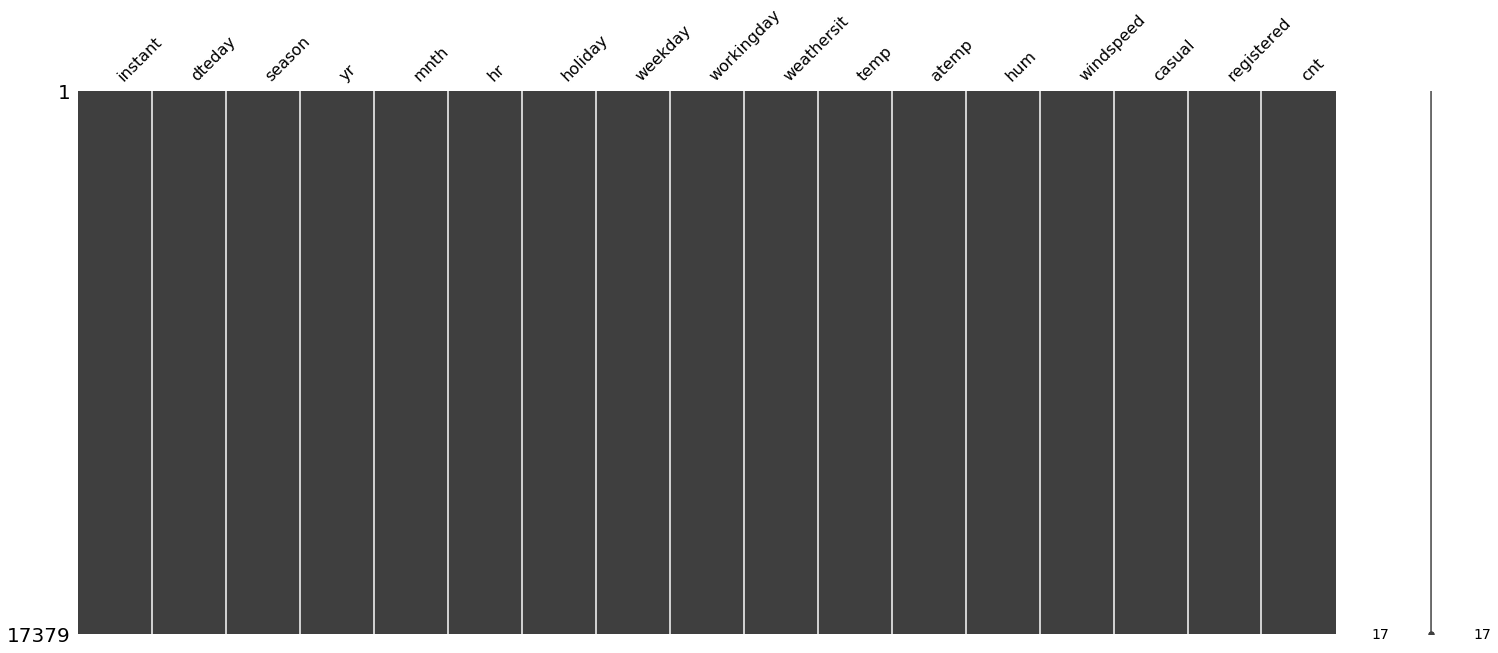

In [7]:
msno.matrix(hourly_data)

In [15]:
last_month_data = hourly_data[(hourly_data["yr"]==1) & (hourly_data["mnth"]==12)]
last_month_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16637,16638,2012-12-01,4,1,12,0,0,6,0,1,0.26,0.3030,0.81,0.0000,9,99,108
16638,16639,2012-12-01,4,1,12,1,0,6,0,1,0.26,0.3030,0.81,0.0000,5,64,69
16639,16640,2012-12-01,4,1,12,2,0,6,0,2,0.26,0.3030,0.81,0.0000,3,47,50
16640,16641,2012-12-01,4,1,12,3,0,6,0,2,0.26,0.2727,0.81,0.1343,1,14,15
16641,16642,2012-12-01,4,1,12,4,0,6,0,1,0.26,0.2879,0.81,0.0896,0,5,5


In [16]:
remaining_data = hourly_data[~hourly_data.isin(last_month_data)].dropna()
remaining_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [ ]:
remaining_data['dteday'].max(), remaining_data['dteday'].min()

In [ ]:
last_month_data['dteday'].max(), last_month_data['dteday'].min()

## Part 2 - Data Processing and Analysis

**Tasks:**
1. Perform all needed steps to load and clean the data. Please comment the major steps of your code.
2. Visualise rentals of bikes per day.
3. Assume that each bike has exactly maximum 12 rentals per day.
    * Find the maximum number of bicycles `nmax` that was needed in any one day.
    * Find the 95%-percentile of bicycles `n95` that was needed in any one day.
5. Vizalize the distribution of the covered days depending on the number of available bicycles (e.g. `nmax` bicycles would cover 100% of days, `n95` covers 95%, etc.)


In [ ]:
# TODO: your code comes here

In [17]:
# let us consider season.
remaining_data.season.value_counts()

3.0    4496
2.0    4409
1.0    3980
4.0    3752
Name: season, dtype: int64

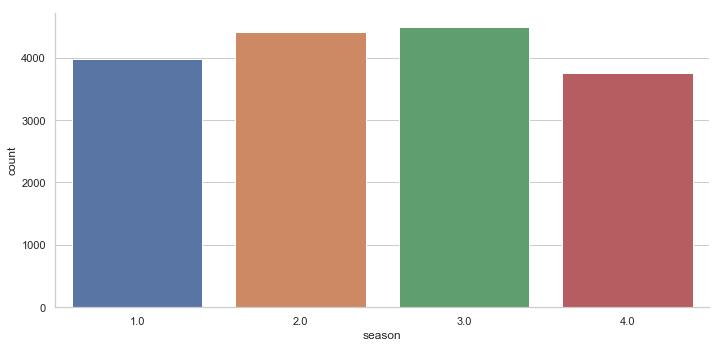

In [20]:
# visualize the bike rentals per season
sns.factorplot(x='season',data=remaining_data,kind='count',size=5,aspect=2)

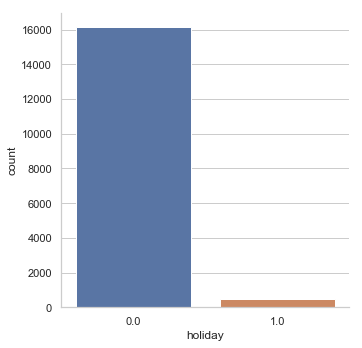

In [22]:
# visualize the bike rentals during holiday and non-holiday
remaining_data.holiday.value_counts()
sns.factorplot(x='holiday',data=remaining_data,kind='count',size=5,aspect=1) # majority of data is for non holiday days.

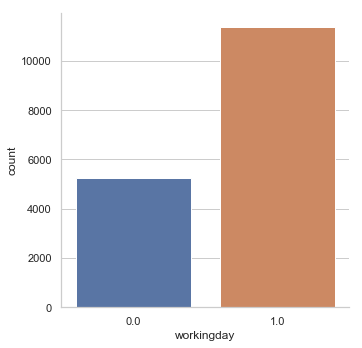

In [23]:
# visualize the bike rentals during working day
remaining_data.workingday.value_counts()
sns.factorplot(x='workingday',data=remaining_data,kind='count',size=5,aspect=1) # majority of data is for working days.

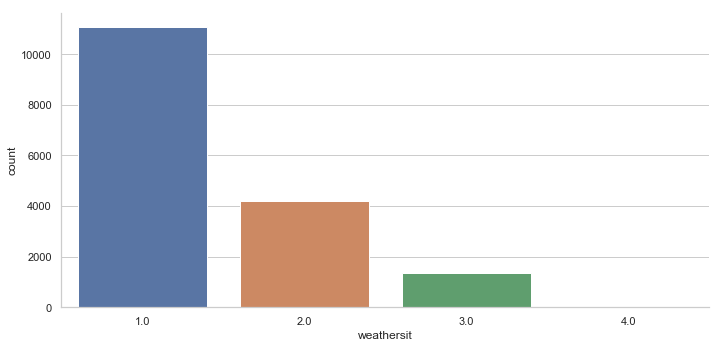

In [27]:
# weather
#remaining_data.weathersit.value_counts()
sns.factorplot(x='weathersit',data=remaining_data,kind='count',size=5,aspect=2)  
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter

In [28]:
remaining_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16637.00000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,8319.00000,2.482058,0.480375,6.294164,11.547875,0.028671,3.006552,0.684378,1.415580,0.504745,0.482608,0.624756,0.190310,36.471239,154.005770,190.477009
std,4802.83255,1.085930,0.499630,3.310969,6.914199,0.166885,2.002377,0.464777,0.637298,0.192369,0.171557,0.193227,0.121915,49.995203,151.319818,182.026755
min,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4160.00000,2.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,35.000000,41.000000
50%,8319.00000,2.000000,0.000000,6.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.520000,0.500000,0.620000,0.194000,17.000000,116.000000,143.000000
75%,12478.00000,3.000000,1.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,50.000000,220.000000,282.000000
max,16637.00000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


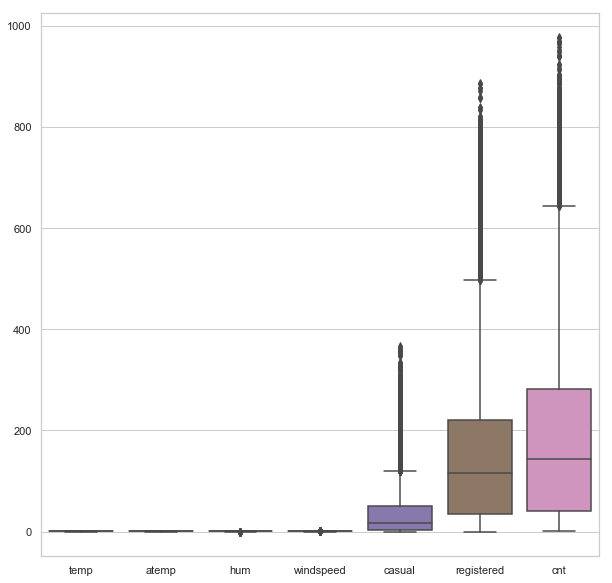

In [30]:
# visualize few nature impacting features
sns.boxplot(data=remaining_data[['temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
fig=plt.gcf()
fig.set_size_inches(10,10)

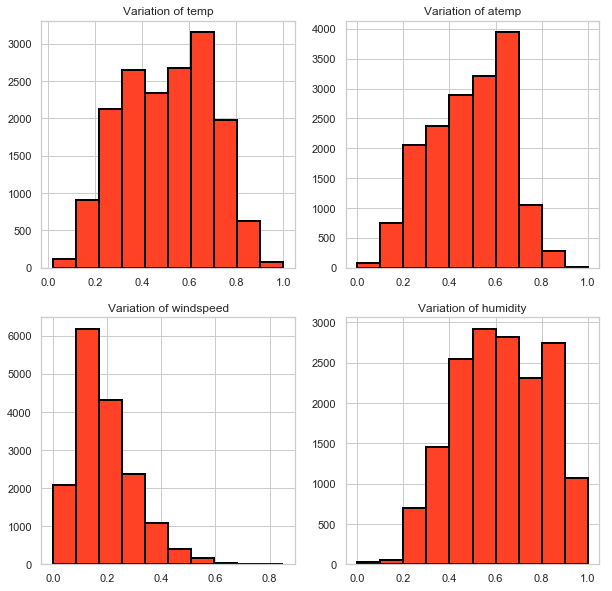

In [31]:
# can also be visulaized using histograms for all the continuous variables.
remaining_data.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=remaining_data,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temperature")
axes[0,1].hist(x="atemp",data=remaining_data,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of actual temp")
axes[1,0].hist(x="windspeed",data=remaining_data,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="hum",data=remaining_data,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

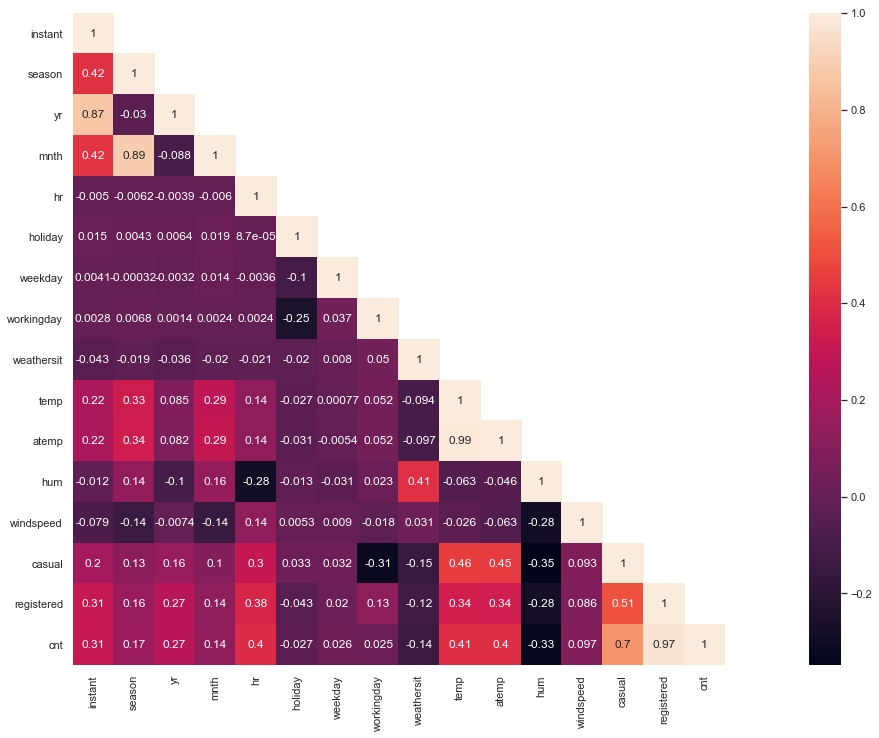

In [32]:
#corelation matrix.
cor_mat= remaining_data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

**Answers / comments / reasoning:**

-
INFERENCES FROM THE ABOVE HEATMAP--
self realtion i.e. of a feature to itself is equal to 1 as expected.

temp and atemp are highly related as expected.

humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

also note that casual and working day are highly inversely related as you would expect.

Also note that count and holiday are highly inversely related as you would expect.

Also note that temp(or atemp) highly effects the count.

Also note that weather and count are highly inversely related. This is bcoz for uour data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.

registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

similarly we can draw some more inferences like weather and humidity and so on... .

In [ ]:
## NOW WE CAN DO SOME FEATURE ENGINEERING AND GET SOME NEW FEATURES AND DROP SOME USELESS OR LESS RELEVANT FEATURES. ##

In [35]:
# # seperating season as per values. this is bcoz this will enhance features.
# splitting features and train
#masked_customer_id = remaining_data['masked_customer_id']
remaining_data = remaining_data.set_index('instant')
labels = remaining_data[['casual', 'registered']]
features = remaining_data[remaining_data.columns.difference(['casual', 'registered', 'dteday'])]
#df.drop(['casual','registered'],axis=1,inplace=True)

# scaling the data (using MinMaxScaler to get positive values)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_data, index=features.index, columns=list(features.columns))



In [36]:
scaled_data.head()

,atemp,cnt,holiday,hr,hum,mnth,season,temp,weathersit,weekday,windspeed,workingday,yr
instant,,,,,,,,,,,,,
1.0,0.2879,0.015369,0.0,0.000000,0.81,0.0,0.0,0.224490,0.0,1.0,0.0,0.0,0.0
2.0,0.2727,0.039959,0.0,0.043478,0.80,0.0,0.0,0.204082,0.0,1.0,0.0,0.0,0.0
3.0,0.2727,0.031762,0.0,0.086957,0.80,0.0,0.0,0.204082,0.0,1.0,0.0,0.0,0.0
4.0,0.2879,0.012295,0.0,0.130435,0.75,0.0,0.0,0.224490,0.0,1.0,0.0,0.0,0.0
5.0,0.2879,0.000000,0.0,0.173913,0.75,0.0,0.0,0.224490,0.0,1.0,0.0,0.0,0.0


In [ ]:

multivar_features = ['season','weather']
encoded_data = pd.get_dummies(remaining_data, columns=multivar_features, prefix='season', drop_first=True)
season=pd.get_dummies(remaining_data['season'],prefix='season')
remaining_data=pd.concat([remaining_data,season],axis=1)
remaining_data.head()

season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)
test_df.head()

## Part 3 - Building prediction models

**Tasks:**
1. Define a test metric for predicting the daily demand for bike sharing, which you would like to use to measure the accuracy of the constructed models, and explain your choice.
2. Build a demand prediction model with Random Forest, preferably making use of following python libraries: scikit-learn. 
3. Report the value of the chosen test metric on the provided data. 

In [ ]:
# TODO: your code comes here

**Answers / comments / reasoning:**

-

## Part 4 - Fine-tuning of one of the models

**Tasks:**
1. Take one of the above constructed models and finetune its most important hyperparameters
2. Explain your choice for the hyperparameters
3. Report the improvement of your test metric

In [ ]:
# TODO: your code comes here

**Answers / comments / reasoning:**

-

## Part 5 - Optimise (revenue - cost) by adapting number of bicycles
**Tasks:**
1. Assume that the revenue per rental is x (your own assumed number).
2. Each bicycle has costs of y per day (your own assumed number).
3. Determine residuals from your test set (after predicting demand of bike sharing). Consider the residuals as random shocks affecting the average values and resulting in real observed values. Assume this random variable is gaussian distributed. Calculate mean and standard deviation and use it as approximation for a gaussian distribution where you can sample from.
4. Simulate the profit with a fixed number of `nmax` (from part 2) bicycles for the next 30 days given that the real observed values are expected to be different from average predicted values. Calculate the demand by adding the simulated residuals to calculated expected values from the data you put aside in part 1.
5. Use grid search along the number of available bikes to find the optimal number of bikes to obtain highest profit (revenue - cost) from simulations.


In [ ]:
# TODO: your code comes here

**Answers / comments / reasoning:**

-

## Part 6 - Reflection / comments

**Tasks:**
(Optional) Please share with us any free form reflection, comments or feedback you have in the context of this test task.

## Submission

Please submit this notebook with your developments in .ipynb and .html formats as well as your requirements.txt file.

## References

[1] Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 